# BA870 Assignment1

Yingming Ma, Yanqi Su

02/09/2024

##Load the dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('assign1-fix.csv')
df.dropna()
df.head()

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve
0,1121,12/31/22,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,72.964,3366.917,38.92,10,97.105
1,1380,12/31/22,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,1343.000,11324.000,141.82,10,43422.022
2,1661,12/31/22,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,-1852.191,2653.766,154.87,10,1458.101
3,1678,12/31/22,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,-5800.000,10961.000,46.68,10,14543.574
4,1864,1/31/22,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,642.350,774.802,96.00,10,568.320


In [38]:
df.describe()

,gvkey,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4.143000e+03
mean,68788.296162,2838.676972,9141.545973,699.473091,815.686837,2260.312535,5787.138424,1860.860470,6547.985255,45.761654,31.090997,1.079716e+04
std,72971.209691,11309.900743,34152.368936,13724.068718,4373.475906,9726.520173,22174.194242,13157.676893,28433.224052,332.397139,12.139725,5.915286e+04
min,1004.000000,0.003000,0.005000,0.013000,-26532.098000,0.003000,0.012000,-102034.000000,0.001000,0.000001,10.000000,6.000000e-03
25%,21430.000000,51.214500,102.867500,27.242500,-22.297000,22.705000,40.720500,-300.668000,40.166000,1.935000,20.000000,7.265650e+01
50%,36383.000000,304.645000,711.363000,65.472000,5.934000,131.433000,330.110000,-31.187000,436.674000,10.060000,30.000000,6.524500e+02
75%,111051.500000,1305.689500,3818.420000,177.037500,265.077500,752.968500,2256.053500,396.774000,2656.783000,39.985000,45.000000,4.030669e+03
max,353945.000000,239728.503000,603595.692000,606407.693000,119437.000000,195571.280000,413010.095000,419590.000000,569962.000000,20000.000000,55.000000,2.071529e+06


##Data Preparation and Outlier Management for Z-Score Analysis

In [39]:
df['A'] = (df['act'] - df['lct']) / df['at']
df['B'] = df['re'] / df['at']
df['C'] = df['ebit'] / df['at']
df['D'] = df['mve'] / df['lt']
df['E'] = df['sale'] / df['at']
df.head()

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve,A,B,C,D,E
0,1121,12/31/22,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,72.964,3366.917,38.92,10,97.105,0.049675,0.189932,0.016324,0.333715,8.764384
1,1380,12/31/22,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,1343.000,11324.000,141.82,10,43422.022,0.070754,0.061904,0.174833,3.289796,0.521964
2,1661,12/31/22,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,-1852.191,2653.766,154.87,10,1458.101,0.085464,-0.391596,0.006165,0.414886,0.561067
3,1678,12/31/22,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,-5800.000,10961.000,46.68,10,14543.574,-0.015821,-0.441165,0.377881,1.232297,0.833726
4,1864,1/31/22,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,642.350,774.802,96.00,10,568.320,0.535438,1.167143,0.125525,9.049826,1.407807


The code calculate all necessary ratios used to calculate the Z_Score for each company using the formula given.

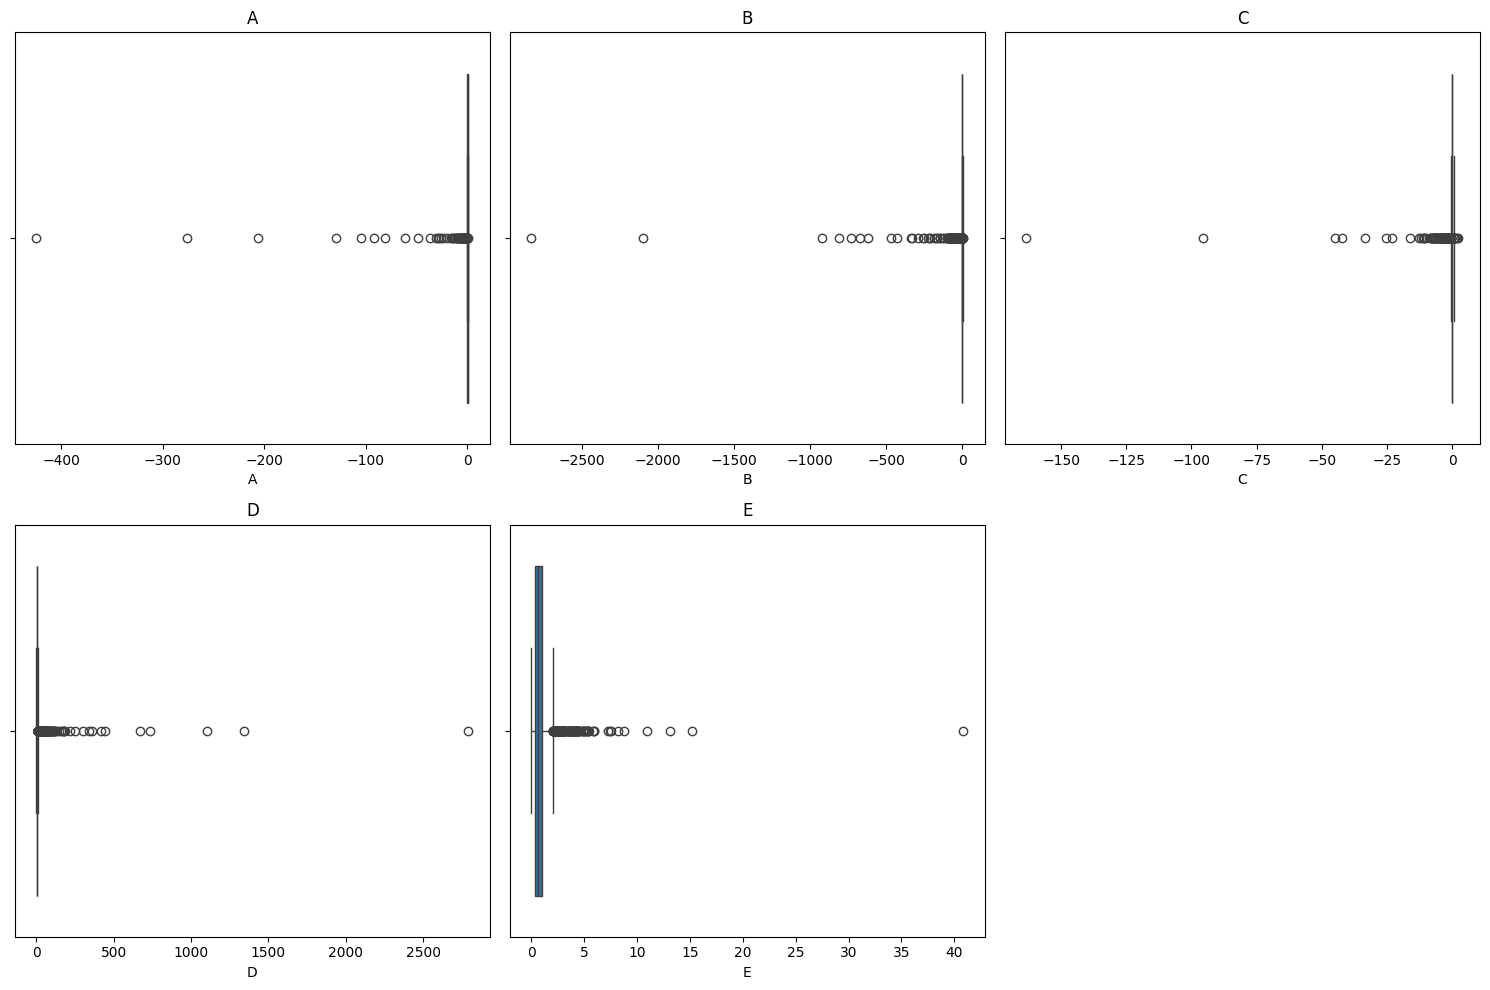

In [40]:
plt.figure(figsize=(15, 10))
columns_original = ['A', 'B', 'C', 'D', 'E']
for i, column in enumerate(columns_original, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

The code is for generating boxplots for the ratios 'A' to 'E'. It sets up a figure size, iterates through the column names, creates a subplot for each column, and then plots a boxplot for each one. The plt.tight_layout() ensures that the plots are neatly arranged, and plt.show() displays the figure with all the boxplots.

The box plots for financial ratios A, B, C, D, and E display notable outliers, indicative of significant variations within the dataset.

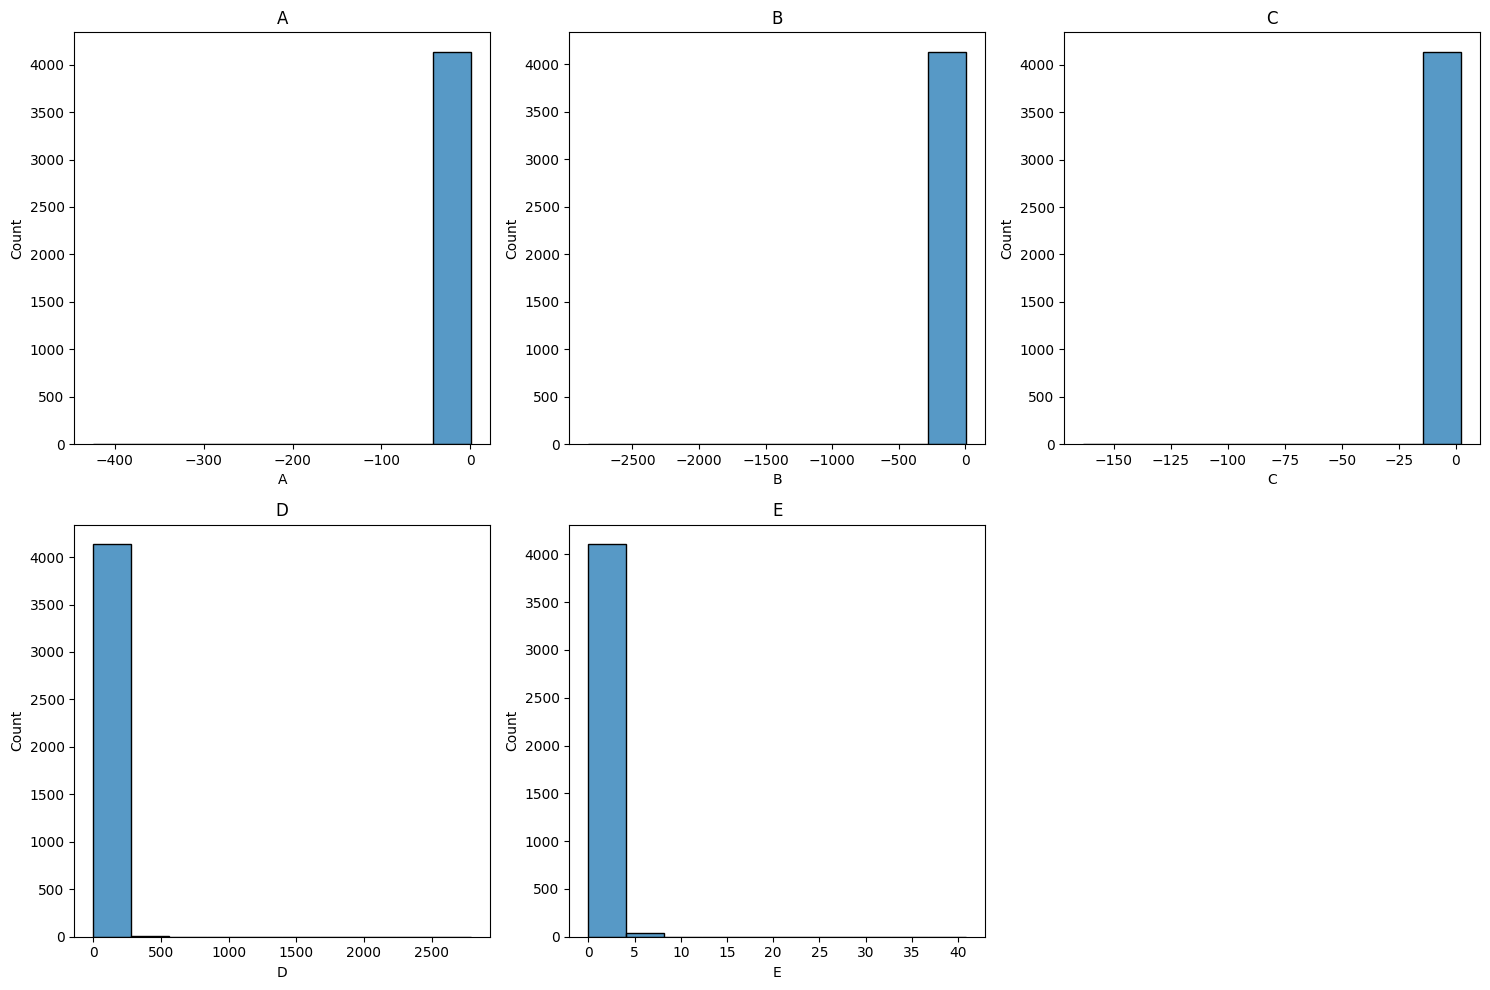

In [41]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_original, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=10, kde=False)
    plt.title(column)
plt.tight_layout()
plt.show()

The code is for generating histograms for the ratios 'A' to 'E'.

The histograms for financial ratios A, B, C, D, and E have a significant skewness towards one end of the spectrum, indicating that companies cluster around lower ratio values.

In [42]:
from scipy.stats.mstats import winsorize
df_A = df['A']
df_B = df['B']
df_C = df['C']
df_D = df['D']
df_E = df['E']
df_A_win = winsorize(df_A, (0.01, 0.01))
df_B_win = winsorize(df_B, (0.01, 0.01))
df_C_win = winsorize(df_C, (0.01, 0.01))
df_D_win = winsorize(df_D, (0.01, 0.01))
df_E_win = winsorize(df_E, (0.01, 0.01))
df['A_win'] = df_A_win
df['B_win'] = df_B_win
df['C_win'] = df_C_win
df['D_win'] = df_D_win
df['E_win'] = df_E_win
df.head()

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,...,A,B,C,D,E,A_win,B_win,C_win,D_win,E_win
0,1121,12/31/22,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,...,0.049675,0.189932,0.016324,0.333715,8.764384,0.049675,0.189932,0.016324,0.333715,4.049573
1,1380,12/31/22,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,...,0.070754,0.061904,0.174833,3.289796,0.521964,0.070754,0.061904,0.174833,3.289796,0.521964
2,1661,12/31/22,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,...,0.085464,-0.391596,0.006165,0.414886,0.561067,0.085464,-0.391596,0.006165,0.414886,0.561067
3,1678,12/31/22,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,...,-0.015821,-0.441165,0.377881,1.232297,0.833726,-0.015821,-0.441165,0.377881,1.232297,0.833726
4,1864,1/31/22,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,...,0.535438,1.167143,0.125525,9.049826,1.407807,0.535438,1.017335,0.125525,9.049826,1.407807


The code imports the winsorize function from the SciPy library to limit extreme values in the data. It applies winsorization to the ratios 'A' to 'E', setting the ratios at the 1% and 99% percentiles. This caps extreme values to reduce the influence of possible outliers. The winsorized data is stored in new columns like "A_win" and "B_win".

The winsorization has been applied to the ratios 'A', 'B', 'C', 'D', and 'E', which are critical in calculating the Z-Score. By capping the ratios at the 1% and 99% percentiles, the distribution of each financial measure has been altered to reduce the impact of unusually high or low values.

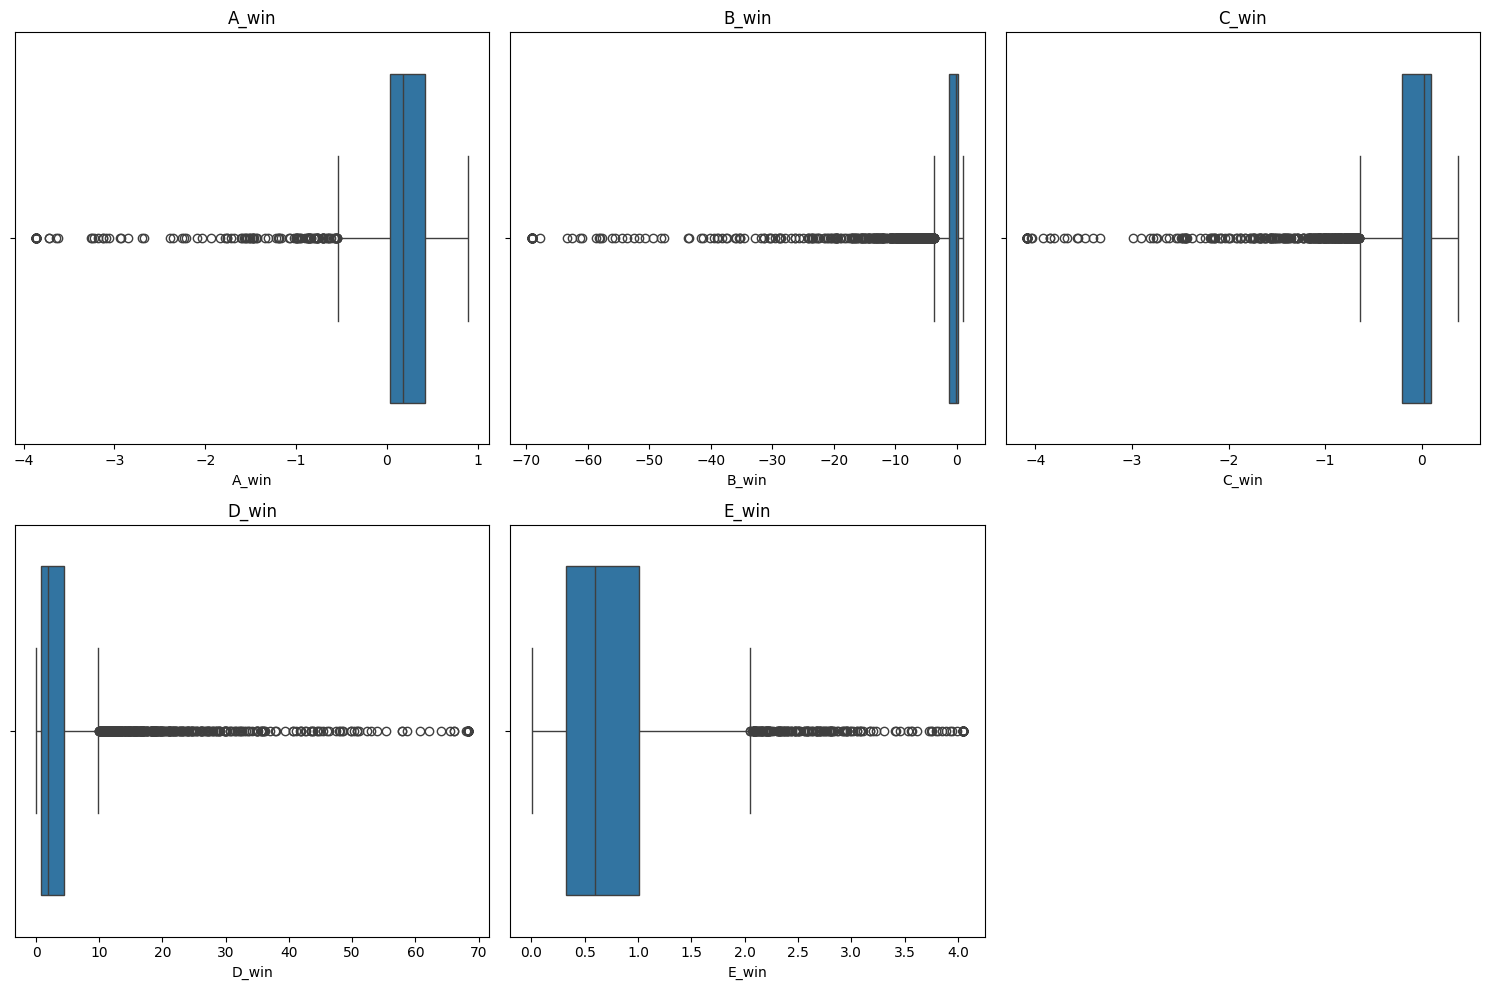

In [43]:
plt.figure(figsize=(15, 10))
columns_win = ['A_win', 'B_win', 'C_win', 'D_win', 'E_win']
for i, column in enumerate(columns_win, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

The code is for generating boxplots for the winsorized data "A_win", "B_win", "C_win", "D_win", "E_win".

Plots show that there are fewer extreme values, which are now closer to the interquartile range, suggesting that the winsorization was somewhat successful. The existence of data points outside the whiskers, however, indicates that there may still be some variability in the ratios after capping the extremes, which may be indicative of the underlying financial dynamics of the companies.

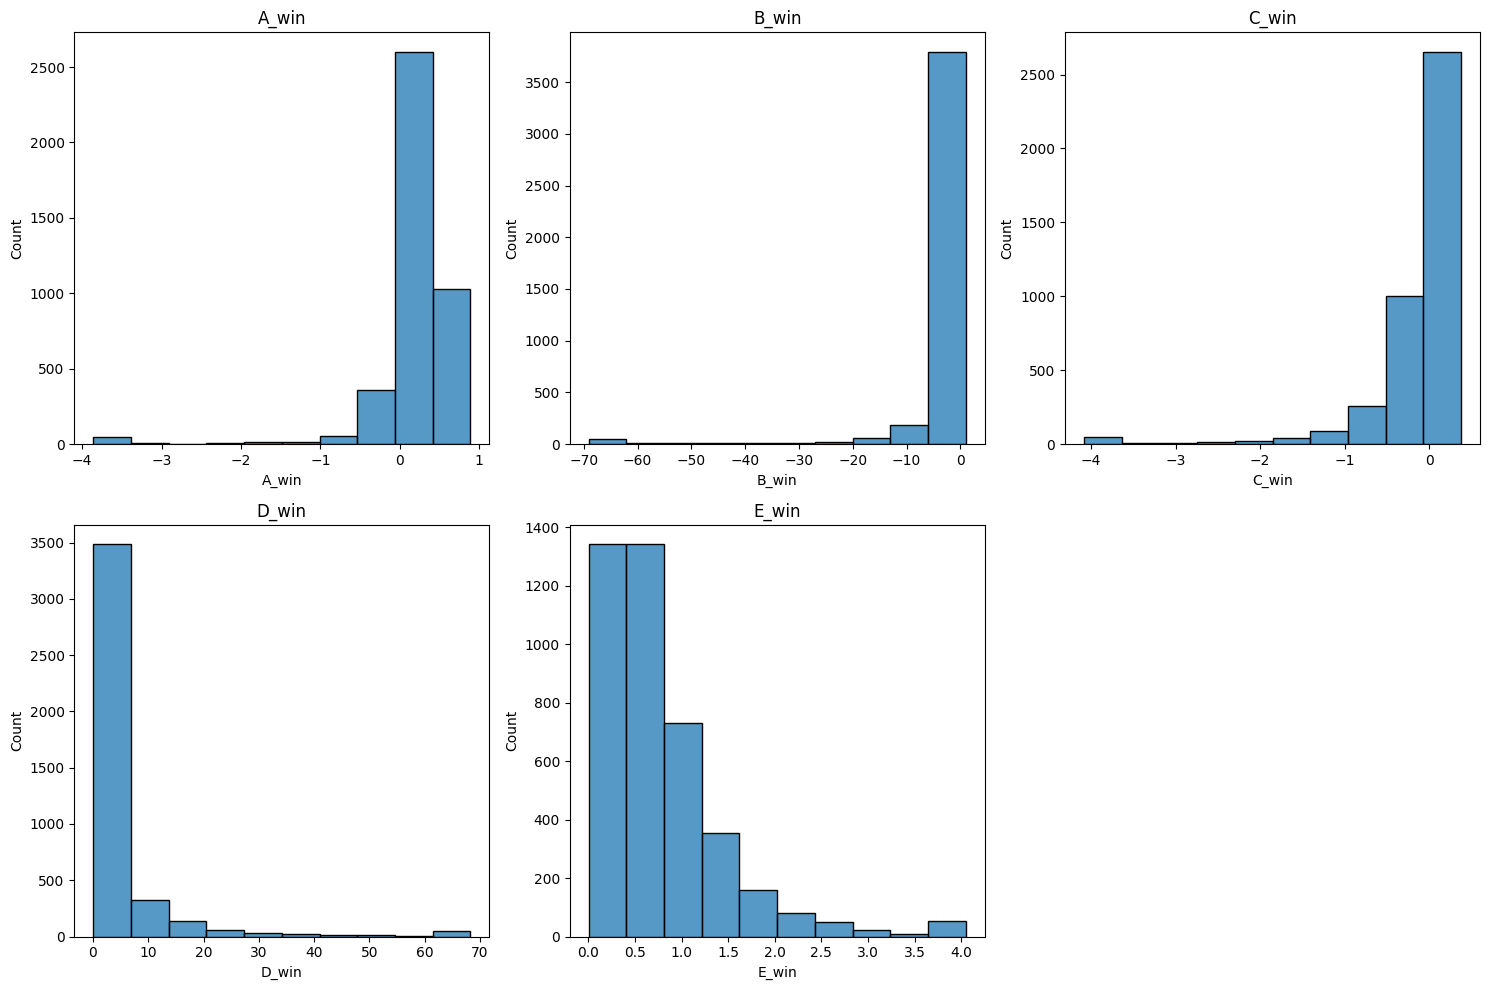

In [44]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_win, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=10, kde=False)
    plt.title(column)
plt.tight_layout()
plt.show()

The code is for generating histograms for the winsorized data "A_win", "B_win", "C_win", "D_win", "E_win".

The histograms show the frequency distribution of the winsorized financial ratios. They show that the majority of the data is concentrated in a narrow range, demonstrating how winsorization limits the spread of the data. This concentration indicates a normalization of the ratios, which reduces the impact of extreme values.

##Evaluation of Financial Statistical data

In [45]:
df['Z_score'] = 1.2 * df['A_win'] + 1.4 * df['B_win'] + 3.3 * df['C_win'] + 0.6 * df['D_win'] + 1 * df['E_win']
df['Z_score'].describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    4143.000000
mean       -0.045953
std        15.186289
min      -114.602612
25%        -0.046623
50%         1.864172
75%         3.746956
max        45.183629
Name: Z_score, dtype: float64

The code here denmostrate the calculation of Z-Scores using formula: Z = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1E

The descriptive statistics of the Z-Scores for the companies in the dataset show a mean that is slightly less than zero, indicating that the companies may be approaching a zone of financial concern. The median is positive, indicating that more than half of the companies are in a relatively safe zone, despite the fact that some companies with particularly low Z-Scores are dragging down the overall average. The large standard deviation reflects a wide range in the financial stability of these companies. The range between the minimum and maximum Z-Scores is quite wide, with the lowest Z-Score significantly in the negative range, indicating a high risk of financial distress for certain companies, and the highest Z-Score indicating that some companies are in extremely secure financial positions. This diversity in Z-Scores across the dataset indicates a mixed financial landscape, with some companies requiring closer scrutiny and possibly intervention, while others are financially stable.

In [46]:
import numpy as np
df['log_at']=np.log(df['at'])
df['log_at'].describe()

count    4143.000000
mean        6.429269
std         2.653560
min        -5.298317
25%         4.633441
50%         6.567183
75%         8.247592
max        13.310660
Name: log_at, dtype: float64

The 'at' column of the dataframe 'df' is subjected to the natural logarithm by the code, which then stores the outcome in a new 'log_at' column. After that, it provides a summary of the statistics in the 'log_at' column, reporting count, mean, standard deviation, and different percentiles to depict the distribution.

Descriptive statistics of the log(at) of total assets for all firms in the data show a mean value of about 6.43, which suggests that the average size of total firm assets is quite large when indexed. The presence of a negative minimum value indicates that at least one firm in the dataset has a very small asset base. The median of the log(at) is higher than the mean, which can be attributed to the right-skewed distribution, implying that more than half of the firms have total assets that are higher than the average asset size. With a standard deviation of about 2.65, there is a large variation in the asset size of the firms. The range from the 25th percentile to the 75th percentile is quite small compared to the overall range, suggesting that the total asset size of most firms is within a relatively narrow logarithmic range. The largest values indicate that the largest firms have much higher total asset sizes, which illustrates the varying scale of operations among this group of firms.

In [47]:
safe_zone = (df['Z_score'] >= 2.99).mean() * 100
grey_zone = ((df['Z_score'] >= 1.8) & (df['Z_score'] < 2.99)).mean() * 100
distress_zone = (df['Z_score'] < 1.8).mean() * 100
zone_percentages = {"Safe Zone": safe_zone,"Grey Zone": grey_zone,"Distress Zone": distress_zone}
zone_percentages

{'Safe Zone': 33.57470432054067,
 'Grey Zone': 17.49939657253198,
 'Distress Zone': 48.925899106927346}

The code calculates the percentage of companies within specified Z-Score zones. It finds the proportion in the 'Safe Zone' (Z-Score >= 2.99), 'Grey Zone' (1.8 <= Z-Score < 2.99), and 'Distress Zone' (Z-Score < 1.8), then multiplies these by 100 to convert to percentages.

The percentage of the companies have a Z-Score in the safe zone is 33.57%, in the grey zone is 17.5%, and in distress zone is 48.93%.

In [48]:
descriptive_stats = df.groupby('gsector')[['Z_score','log_at']].describe()
descriptive_stats

Z_score                                                       \
          count      mean        std         min       25%       50%   
gsector                                                                
10        252.0  0.759575  13.482799 -110.363784  0.861764  1.847123   
15        291.0  2.458455  11.876596  -93.502663  1.372794  2.368707   
20        701.0  1.223293  11.940525 -114.602612  0.884757  2.318277   
25        585.0  1.525450   7.758456 -112.247537  0.798556  2.099950   
30        250.0  0.881910  14.903703 -110.779045  1.030509  2.392799   
35        956.0 -3.636485  19.834810 -114.081434 -5.095491  0.427291   
45        717.0  1.101436  16.313376 -113.427245  0.233503  2.523393   
50        290.0 -1.796623  17.884157 -113.842941 -0.071907  1.219822   
55        101.0  1.387824   2.458172   -6.936291  0.698139  0.983191   

                             log_at                                          \
              75%        max  count      mean       std       min       25%   
gsector                                                                       
10       3.120563  45.183629  252.0  7.058034  2.772364 -4.268698  5.512808   
15       3.687787  43.003756  291.0  7.162386  2.429649 -0.324346  5.546546   
20       3.784741  42.714429  701.0  6.769289  2.445397 -4.605170  5.255509   
25       3.499860  26.278990  585.0  6.916454  2.273888 -2.617296  5.675266   
30       4.251859  40.603666  250.0  6.651305  3.061528 -2.040221  4.399875   
35       3.502971  43.703846  956.0  5.438454  2.459802 -3.442019  3.834040   
45       5.417011  43.802141  717.0  5.967850  2.619794 -3.324236  4.029290   
50       2.469234  39.482597  290.0  6.660467  2.950572 -5.298317  4.661282   
55       1.433361  18.510216  101.0  9.007052  2.258964  2.431682  7.828742   

                                         
              50%        75%        max  
gsector                                  
10       7.357018   8.708006  13.001379  
15       7.567552   8.898643  11.479824  
20       7.096784   8.400570  12.143069  
25       6.934602   8.412232  13.310660  
30       6.994139   9.023162  12.408442  
35       5.386782   6.857730  12.411887  
45       6.115786   7.726167  12.807214  
50       6.814655   8.809429  12.906327  
55       9.255218  10.642375  12.435906

The code groups the dataset by 'gsector', then selects the 'Z_score' and 'log_at' columns to apply the describe() function, which computes descriptive statistics including count, mean, standard deviation, min, 25th percentile, median, 75th percentile, and max for each sector.

Companies in Sector 10 have varying financial health, with a mean Z-Score of less than one and a broad standard deviation, indicating a range of financial stability. The Z-Score ranges from very negative to very positive, indicating a combination of distress and robustness. The average size of companies, according to log(at), ranges from small to large, with most companies having assets larger than the mean, indicating different scales of operation within the sector.

Companies in Sector 15 have a strong financial structure, implying good fiscal health. This sector's Z-Score indicates that, despite an overall positive outlook, financial stability varies by company, with some outliers potentially skewing the mean. In terms of assets, log(at) values vary significantly, indicating a wide range of company sizes, from small to significantly larger entities. The spread within log(at) indicates variability in the operational scale and, possibly, the market influence of these companies within the sector.


In Sector 20, the average Z-Score represents a baseline of financial viability for the sector's companies. However, the standard deviation reveals a wide disparity in financial health, indicating the presence of both financially strong companies and those that may be struggling or at risk. The wide range of log(at) values emphasizes this diversity further, with a range of company sizes that may reflect different business models, market positioning, and operational efficiencies. The sector appears to be a microcosm of the larger economic landscape, with players of various sizes and financial situations.

The mean Z-Score for Sector 25 suggests a generally stable financial footing for companies within this sector, yet the variation in Z-Scores, as indicated by the standard deviation, reveals that not all companies share equally in this stability. Some companies experience financial stress. The log(at) statistics also reveal a significant variation in the size of the companies, from relatively small to large, which may correlate with their financial health and risk profiles. The sector thus presents a complex picture, with financial performance and company size varying across a broad spectrum, suggesting that sector-specific factors could be influencing company performance and growth.

Sector 30's mean Z-Score is just below one, indicating modest financial stability, but the large standard deviation indicates significant variation in fiscal health within the sector. The Z-Score range also indicates significant differences in financial status between companies. Log(at) values indicate a wide range of company sizes, with a median indicating that more than half of companies have assets that are larger than average.

Sector 35 has a negative average Z-Score, indicating that financial concerns may be widespread among its companies. The extremely high standard deviation indicates significant disparities in financial health, with some companies potentially facing severe distress, as suggested by the minimum Z-Score. The log(at) distribution shows a wide range of company sizes, with a median closer to the lower quartile, indicating that smaller businesses are more common in this industry. This diversity in financial and size metrics may reflect different business models or market challenges unique to this sector.

Sector 45's companies are generally financially stable, but the standard deviation reflects significant financial diversity. The lowest Z-Scores indicate that some companies are likely in significant distress. The log(at) statistics show a range of company sizes within this sector, from very small to quite large, indicating operational diversity and possibly different market niches or strategies used by companies in this sector.

Sector 50 has a concerning average Z-Score that is well below zero, indicating that its companies may be in financial distress. The standard deviation indicates wide variation in financial health. The log(at) range demonstrates significant asset size diversity, with the sector housing both small and substantially larger companies.

Sector 55's mean Z-Score indicates good overall financial health. However, the range of Z-Scores, as indicated by a significant standard deviation, indicates varying levels of financial stability among businesses. The log(at) range is completely positive, indicating that all companies in this sector have significant asset bases.

## 10 Companies with lowest Z-Scores

In [49]:
lowest_Zscore_company = df[['conm', 'gsector', 'Z_score']].sort_values(by='Z_score')
lowest_Zscore_company.head(10)

,conm,gsector,Z_score
1207,TRUTANKLESS INC,20,-114.602612
2975,BIOCORRX INC,35,-114.081434
3938,FARMHOUSE INC,50,-113.842941
2920,US STEM CELL INC,35,-113.534691
3620,CARBONMETA TECHNOLOGIES INC,45,-113.427245
1712,ZOOMAWAY TECHNOLOGIES INC,25,-112.247537
2812,HONGCHANG INTL CO LTD,35,-111.962742
3559,ENABLENCE TECHNOLOGIES INC,45,-111.441302
2164,CELL MEDX CORP,35,-111.417277
1990,MISSFRESH LTD -ADR,30,-110.779045


The code filtered the DataFrame for the columns 'com', 'gsector', and 'Z_score', and then applying sort_values(by='Z_score'), the companies are arranged in ascending order based on their Z-Scores. The head(10) function is called to retrieve the first ten entries from this sorted list, which represent the companies with the lowest Z-Scores.

Sector 35's ranking among the companies with the lowest Z-scores is consistent with its overall negative Z-score mean, indicating that the financial strain observed in individual companies may reflect a broader trend of economic stress within the sector.

##Analyzing the Impact of Company Size on Financial Stability

In [50]:
df['log_sale'] = np.log(df['sale'])

In [51]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import r2_score

regr = skl_lm.LinearRegression()
X = df['log_sale'].values.reshape(-1,1)
y =  df['Z_score'].values
regr = skl_lm.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [52]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_with_constant = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_constant).fit()
slope = regr.coef_[0]
r2 = regr.score(X, y)
adj_r2 = ols_model.rsquared_adj
t_stat = ols_model.tvalues[1]
p_value = ols_model.pvalues[1]

results = {
    'slope': slope,
    'r2': r2,
    'adj_r2': adj_r2,
    't_stat': t_stat,
    'p_value': p_value
}
results

{'slope': 1.7949831699331222,
 'r2': 0.13816622831290748,
 'adj_r2': 0.13795810617533522,
 't_stat': 25.765692075812012,
 'p_value': 6.559681435450159e-136}

Calculate the sales figures' natural logarithm first in order to use it as the predictor variable. Imports the r2_score from sklearn.metrics and the LinearRegression class from sklearn.linear_model. The regression analysis is carried out by instantiating a LinearRegression object (regr). The reshaped log(sale) values are assigned to X, converting them into a 2D array as required by the fit method in scikit-learn. The response variable, or Z-Score, is the y variable. The linear regression model is fitted to the data by invoking the fit method on the regr object with the arguments X and y. The statsmodels library is then used for a more detailed statistical analysis. sm.add_constant is a function that adds a constant term to the predictor variable X because statsmodels' OLS does not include a constant by default. An OLS model is then fitted with X_with_constant and y, and the resulting model is stored in ols_model. The slope , R-squared, adjusted R-squared, t-statistic, and p-value are all extracted from ols_model. Finally, a dictionary named results is created to neatly store the key results from the regression, which include the slope, R-squared, adjusted R-squared, t-statistic, and p-value.

According to the OLS regression model results, the company's size has a significant relationship with its Z-Score. The regression coefficient for log(sale) is approximately 1.79, implying that for every 1% increase in sales, we can expect a 1.79 unit increase in the Z-score.


The statistical significance of this relationship is confirmed by a very low p-value of less than 0.05. This means that we can be certain that company size influences the Z-Score, and the likelihood that there is no relationship at all between the two is slim.
